In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def MinMaxScaler(data):
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)
  # noise term prevents the zero division
  return numerator / (denominator + 1e-7)

In [4]:
# train Parameters
seq_length = 7
data_dim = 5
output_dim = 1
learning_rate = 0.01
iterations = 500

In [5]:
# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter = ',')
xy = xy[::-1] # reverse order (chronically ordered)

In [6]:
# train/test split
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:] # Index from [train_size - seq_length] to utilize past sequence

In [7]:
# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

In [8]:
# build datasets
def build_dataset(time_series, seq_length):
  dataX = []
  dataY = []

  for i in range(0, len(time_series) - seq_length):
    x = time_series[i:i + seq_length, :]
    y = time_series[i + seq_length, [-1]] # Next close price
    print(x, "->", y)
    dataX.append(x)
    dataY.append(y)

  return np.array(dataX), np.array(dataY)

In [9]:
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

print(trainX.shape) # (505, 7, 5)
print(trainY.shape)

Streaming output truncated to the last 5000 lines.
[[0.13075879 0.14979736 0.13950917 0.35107108 0.1339569 ]
 [0.15042457 0.16374824 0.15035617 0.23008873 0.14071632]
 [0.14549092 0.14452321 0.11061926 0.34481491 0.154517  ]
 [0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]] -> [0.12107173]
[[0.15042457 0.16374824 0.15035617 0.23008873 0.14071632]
 [0.14549092 0.14452321 0.11061926 0.34481491 0.154517  ]
 [0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]
 [0.13503702 0.12893923 0.13850679 0.18323922 0.12107173]] -> [0.11480508]
[[0.14549092 0.14452321 0.11061926 0.34481491 0.154517  ]
 [0.16681257 0.20764196 0.18773052 0.4378686 

In [10]:
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.LSTM(units = 1, input_shape = (seq_length, data_dim)))
tf.model.add(tf.keras.layers.Dense(units = output_dim, activation = 'tanh'))
tf.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 28        
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
tf.model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(lr = learning_rate))
tf.model.fit(trainX, trainY, epochs = iterations)

Epoch 1/500
16/16 [==============================] - 6s 11ms/step - loss: 0.0969
Epoch 2/500
16/16 [==============================] - 0s 9ms/step - loss: 0.0819
Epoch 3/500
16/16 [==============================] - 0s 7ms/step - loss: 0.0706
Epoch 4/500
16/16 [==============================] - 0s 8ms/step - loss: 0.0628
Epoch 5/500
16/16 [==============================] - 0s 10ms/step - loss: 0.0567
Epoch 6/500
16/16 [==============================] - 0s 10ms/step - loss: 0.0522
Epoch 7/500
16/16 [==============================] - 0s 10ms/step - loss: 0.0482
Epoch 8/500
16/16 [==============================] - 0s 10ms/step - loss: 0.0446
Epoch 9/500
16/16 [==============================] - 0s 9ms/step - loss: 0.0412
Epoch 10/500
16/16 [==============================] - 0s 8ms/step - loss: 0.0381
Epoch 11/500
16/16 [==============================] - 0s 10ms/step - loss: 0.0353
Epoch 12/500
16/16 [==============================] - 0s 10ms/step - loss: 0.0326
Epoch 13/500
16/16 [==========

In [12]:
# Test step
test_predict = tf.model.predict(testX)

7/7 [==============================] - 1s 3ms/step


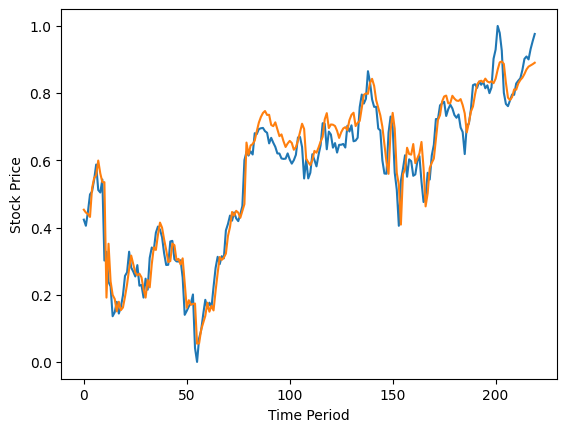

In [13]:
# Plot predictions
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()